In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/HP/Downloads/instagram.csv")

In [3]:
df.head()

,Post_ID,Timestamp,Caption,Hashtags,Mentions,Geotag,Post_URL,User_ID,Username,Profile_URL,...,Media_URLs,Media_Dimensions,Video_Duration,Like_Count,Comment_Count,View_Count,Sponsored_Post,Post_Language,Emojis,Post_Sentiment
0,e135731e-6960-4de0-aa6d-e3120941f69e,2024-08-23 01:30:38,Cut democratic hope together.,"['huge', 'last', 'firm']","['kallen', 'josephbrittany', 'wcain']","('40.34912', '-111.90466', 'Saratoga Springs',...",https://smith.com/,fee0293d-c412-4813-89df-ee94b539b4ce,samantharobinson,https://harris.biz/,...,"['http://www.dyer.info/', 'https://moore.org/'...",481x689,58.0,6007,60,18938,False,kl,"['😂', '❤️', '👏']",neutral
1,d313ab0a-fff6-4707-aec4-4820ebdae120,2024-07-20 00:53:26,City manager tree police lawyer clearly.,"['think', 'Mrs', 'find']","['wthomas', 'sharon68', 'rodriguezkristen']","('65.84811', '24.14662', 'Tornio', 'FI', 'Euro...",http://browning-hunter.com/,05895679-8179-4aca-afc8-dc87fe18e10a,gkoch,https://www.morrison.com/,...,['http://www.leblanc-griffin.info/'],920x850,NaN,2311,61,39705,False,mhr,"['❤️', '😂', '🔥']",negative
2,cb8e9356-a58e-4948-8706-2e3673ce6111,2024-06-24 09:07:33,Beautiful also upon position.,"['great', 'he', 'thus']","['loricrawford', 'maurice93', 'jcarter']","('43.61092', '3.87723', 'Montpellier', 'FR', '...",https://www.griffin.com/,70af3156-18cf-43dc-9b1c-542431ca7701,solisfrank,http://branch.info/,...,"['http://anderson.com/', 'http://cole.com/']",868x493,27.0,9999,809,15748,False,fr,"['😀', '😂', '😀']",positive
3,02d7376e-1541-48f1-bb1e-75e878e1b15c,2024-05-29 05:45:54,Professor hard sister.,"['somebody', 'whether', 'traditional']","['cory97', 'amann']","('51.03427', '5.37429', 'Houthalen', 'BE', 'Eu...",http://www.owens-gomez.com/,5d590b8c-5006-4529-b34c-5ea9582a70af,greenecharles,http://mccullough.com/,...,['https://page.info/'],983x428,64.0,7672,479,31522,False,ve,"['❤️', '😂', '❤️']",negative
4,89d65045-4b8d-4a85-841a-0428987ebb15,2024-01-03 20:15:14,Care and trip democratic very purpose.,"['do', 'despite', 'clearly']","['wlopez', 'martinezrachel']","('18.03496', '-66.8499', 'Yauco', 'PR', 'Ameri...",http://robinson.info/,5b2b0b5f-2750-4f90-b943-991ddb38d5d5,jessicalindsey,http://www.mendez.net/,...,"['https://davis-best.com/', 'https://www.black...",887x985,NaN,5658,605,2858,False,zh,"['😂', '❤️', '👏']",neutral


In [4]:
df.shape

(10000, 22)

In [5]:
df.isnull().sum()

Post_ID                0
Timestamp              0
Caption                0
Hashtags               0
Mentions               0
Geotag                 0
Post_URL               0
User_ID                0
Username               0
Profile_URL            0
Follower_Count         0
Content_Type           0
Media_URLs             0
Media_Dimensions       0
Video_Duration      4979
Like_Count             0
Comment_Count          0
View_Count             0
Sponsored_Post         0
Post_Language         48
Emojis                 0
Post_Sentiment         0
dtype: int64

## Topic modelling

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)
df['Cleaned_Caption'] = df['Caption'].apply(preprocess_text)

In [ ]:
# Convert captions to a matrix of token counts
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Caption'])

nmf_model = NMF(n_components=30, random_state=42)  # You can adjust the number of topics
nmf_topics = nmf_model.fit_transform(tfidf)
# top words in each topic
def get_top_words(model, feature_names, n_top_words=5):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(top_words)
    return topics

feature_names = tfidf_vectorizer.get_feature_names_out()
topics = get_top_words(nmf_model, feature_names)
for idx, topic in enumerate(topics):
    print(f"Topic #{idx+1}: {', '.join(topic)}")

df['Topic'] = nmf_topics.argmax(axis=1) + 1  ## adding that topic in the df


Topic #1: doctor, coach, kid, range, day
Topic #2: increase, ago, attack, wall, happy
Topic #3: green, plan, special, story, animal
Topic #4: professional, surface, democrat, brother, candidate
Topic #5: big, raise, letter, book, pay
Topic #6: sea, attorney, politics, operation, radio
Topic #7: church, admit, court, nature, subject
Topic #8: hard, especially, opportunity, inside, care
Topic #9: spend, short, staff, movement, help
Topic #10: prevent, maintain, allow, language, sort
Topic #11: necessary, discuss, management, tax, produce
Topic #12: ahead, leader, republican, sit, state
Topic #13: structure, financial, left, office, change
Topic #14: thousand, finally, near, speak, expert
Topic #15: control, easy, true, interesting, particular
Topic #16: hope, positive, people, change, blood
Topic #17: concern, area, reduce, exist, lose
Topic #18: fight, method, production, marriage, agency
Topic #19: series, treatment, size, expect, shoulder
Topic #20: probably, data, act, effort, wide
T

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
topic_names = {
    1: "Health & Education",
    2: "Past Events & Emotions",
    3: "Environment & Wildlife",
    4: "Politics & Social Status",
    5: "Finance & Communication",
    6: "Law & Media",
    7: "Religion & Society",
    8: "Opportunities & Care",
    9: "Employment & Assistance",
    10: "Rules & Communication",
    11: "Economics & Management",
    12: "Leadership & Politics",
    13: "Finance & Administration",
    14: "Expertise & Public Speaking",
    15: "Self-Control & Truth",
    16: "Hope & Change",
    17: "Geography & Environmental Impact",
    18: "Family & Social Systems",
    19: "Health & Treatment",
    20: "Data & Action",
    21: "Research & Defense",
    22: "Science & Education",
    23: "Peace & Governance",
    24: "Sports & Social Interaction",
    25: "Property & Politics",
    26: "Responsibility & Agreement",
    27: "Education & Social Focus",
    28: "Health & Lifestyle Choices",
    29: "Experience & Knowledge",
    30: "Learning & Development"
}

df['Topic_Name'] = df['Topic'].map(topic_names)

df

,Post_ID,Timestamp,Caption,Hashtags,Mentions,Geotag,Post_URL,User_ID,Username,Profile_URL,...,Post_Sentiment,Cleaned_Caption,Predicted_Sentiment,Emoji_Sentiment_Score,Final_Sentiment,Engagement,Date,Z_Score,Topic,Topic_Name
0,e135731e-6960-4de0-aa6d-e3120941f69e,2024-08-23 01:30:38,Cut democratic hope together.,"['huge', 'last', 'firm']","['kallen', 'josephbrittany', 'wcain']","('40.34912', '-111.90466', 'Saratoga Springs',...",https://smith.com/,fee0293d-c412-4813-89df-ee94b539b4ce,samantharobinson,https://harris.biz/,...,neutral,cut democratic hope together,positive,2,positive,25005,2024-08-23,-0.381947,16,Hope & Change
1,d313ab0a-fff6-4707-aec4-4820ebdae120,2024-07-20 00:53:26,City manager tree police lawyer clearly.,"['think', 'Mrs', 'find']","['wthomas', 'sharon68', 'rodriguezkristen']","('65.84811', '24.14662', 'Tornio', 'FI', 'Euro...",http://browning-hunter.com/,05895679-8179-4aca-afc8-dc87fe18e10a,gkoch,https://www.morrison.com/,...,negative,city manager tree police lawyer clearly,positive,2,positive,42077,2024-07-20,0.787581,29,Experience & Knowledge
2,cb8e9356-a58e-4948-8706-2e3673ce6111,2024-06-24 09:07:33,Beautiful also upon position.,"['great', 'he', 'thus']","['loricrawford', 'maurice93', 'jcarter']","('43.61092', '3.87723', 'Montpellier', 'FR', '...",https://www.griffin.com/,70af3156-18cf-43dc-9b1c-542431ca7701,solisfrank,http://branch.info/,...,positive,beautiful also upon position,positive,3,positive,26556,2024-06-24,-0.275694,21,Research & Defense
3,02d7376e-1541-48f1-bb1e-75e878e1b15c,2024-05-29 05:45:54,Professor hard sister.,"['somebody', 'whether', 'traditional']","['cory97', 'amann']","('51.03427', '5.37429', 'Houthalen', 'BE', 'Eu...",http://www.owens-gomez.com/,5d590b8c-5006-4529-b34c-5ea9582a70af,greenecharles,http://mccullough.com/,...,negative,professor hard sister,negative,1,positive,39673,2024-05-29,0.622894,8,Opportunities & Care
4,89d65045-4b8d-4a85-841a-0428987ebb15,2024-01-03 20:15:14,Care and trip democratic very purpose.,"['do', 'despite', 'clearly']","['wlopez', 'martinezrachel']","('18.03496', '-66.8499', 'Yauco', 'PR', 'Ameri...",http://robinson.info/,5b2b0b5f-2750-4f90-b943-991ddb38d5d5,jessicalindsey,http://www.mendez.net/,...,neutral,care trip democratic purpose,positive,2,positive,9121,2024-01-03,-1.470089,27,Education & Social Focus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,838fbabf-3e8c-4080-8372-3cd11c541d13,2024-01-11 06:33:39,Possible war central.,"['soon', 'spend', 'big']",['tatejeffrey'],"('35', '136.51667', 'Komono', 'JP', 'Asia/Tokyo')",http://ellis-nelson.info/,b7ab0a2f-5741-400b-9ebd-1b9b67abd643,johnny78,https://adams.com/,...,negative,possible war central,negative,2,positive,31771,2024-01-11,0.081562,27,Education & Social Focus
9996,6a7a4c4f-3244-451b-8b00-f8dc0a723b63,2024-08-10 10:45:47,Water before daughter magazine on think.,"['allow', 'culture', 'will']","['bradleyoliver', 'katherine94', 'katrina32']","('51.82721', '107.60627', 'Ulan-Ude', 'RU', 'A...",https://www.landry.com/,f26b0a93-4bec-4aab-844e-1c996fa6855c,fgray,https://www.vasquez-medina.com/,...,neutral,water daughter magazine think,neutral,3,positive,28108,2024-08-10,-0.169374,30,Learning & Development
9997,4b52f3cd-bae9-4af1-8687-4715194ba187,2024-06-07 03:04:10,Information represent east exist lead.,"['ok', 'either', 'interesting']",[],"('-6.91806', '106.92667', 'Sukabumi', 'ID', 'A...",https://arias.info/,91ba7159-4ad8-43b3-a7e3-197ddc69aa88,danielle85,https://www.peterson.com/,...,positive,information represent east exist lead,neutral,1,positive,42705,2024-06-07,0.830603,30,Learning & Development
9998,27140d72-261f-4434-a67c-cb9e48734081,2024-02-11 15:38:27,Between among mother politics third political.,"['million', 'recently', 'mother']","['kimberly23', 'nashpatricia', 'fcarter']","('12.97389', '123.99333', 'Sorsogon', 'PH', 'A...",https://www.nash-brennan.info/,306bcb60-c4d6-4277-afee-e9be9034a606,scott84,https://lewis.net/,...,positive,among mother p

## Sentiment Prediction

In [9]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [10]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(caption):
    sentiment_score = sia.polarity_scores(caption)
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['Predicted_Sentiment'] = df['Caption'].apply(get_sentiment)

In [11]:

emoji_sentiment_mapping = {
    '😀': 1,  # positive
    '😂': 1,  # positive
    '❤️': 1,  # positive
    '👏': 1,  # positive
    '🔥': 1,  # positive
    '😢': -1, # negative
    '😡': -1, # negative
    '😱': -1, # negative
    '😞': -1, # negative
    '😩': -1, # negative
}

In [12]:
def get_emoji_sentiment(emoji_list):
    score = 0
    for emoji in emoji_list:
        score += emoji_sentiment_mapping.get(emoji, 0)  # Default to 0 if emoji not found
    return score

df['Emoji_Sentiment_Score'] = df['Emojis'].apply(get_emoji_sentiment)

In [13]:
# Combine caption and emoji sentiment
def combine_sentiments(caption_sentiment, emoji_score):
    if caption_sentiment == 'positive' and emoji_score > 0:
        return 'positive'
    elif caption_sentiment == 'negative' and emoji_score < 0:
        return 'negative'
    elif caption_sentiment == 'neutral' and emoji_score == 0:
        return 'neutral'
    elif emoji_score > 0:
        return 'positive'
    elif emoji_score < 0:
        return 'negative'
    else:
        return 'neutral'
df['Final_Sentiment'] = df.apply(lambda row: combine_sentiments(row['Predicted_Sentiment'], row['Emoji_Sentiment_Score']), axis=1)




In [14]:
df[['Post_ID', 'Caption', 'Emojis','Predicted_Sentiment', 'Emoji_Sentiment_Score', 'Final_Sentiment']]

,Post_ID,Caption,Emojis,Predicted_Sentiment,Emoji_Sentiment_Score,Final_Sentiment
0,e135731e-6960-4de0-aa6d-e3120941f69e,Cut democratic hope together.,"['😂', '❤️', '👏']",positive,2,positive
1,d313ab0a-fff6-4707-aec4-4820ebdae120,City manager tree police lawyer clearly.,"['❤️', '😂', '🔥']",positive,2,positive
2,cb8e9356-a58e-4948-8706-2e3673ce6111,Beautiful also upon position.,"['😀', '😂', '😀']",positive,3,positive
3,02d7376e-1541-48f1-bb1e-75e878e1b15c,Professor hard sister.,"['❤️', '😂', '❤️']",negative,1,positive
4,89d65045-4b8d-4a85-841a-0428987ebb15,Care and trip democratic very purpose.,"['😂', '❤️', '👏']",positive,2,positive
...,...,...,...,...,...,...
9995,838fbabf-3e8c-4080-8372-3cd11c541d13,Possible war central.,"['👏', '😀', '🙌']",negative,2,positive
9996,6a7a4c4f-3244-451b-8b00-f8dc0a723b63,Water before daughter magazine on think.,"['🔥', '😂', '🔥']",neutral,3,positive
9997,4b52f3cd-bae9-4af1-8687-4715194ba187,Information represent east exist lead.,"['❤️', '😂', '🙌']",neutral,1,positive
9998,27140d72-261f-4434-a67c-cb9e48734081,Between among mother politics third political.,"['🙌', '😂', '😀']",neutral,2,positive


## Engagement analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_29100\3133610133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predicted_Sentiment', y='Engagement', data=engagement_by_sentiment, palette='viridis')


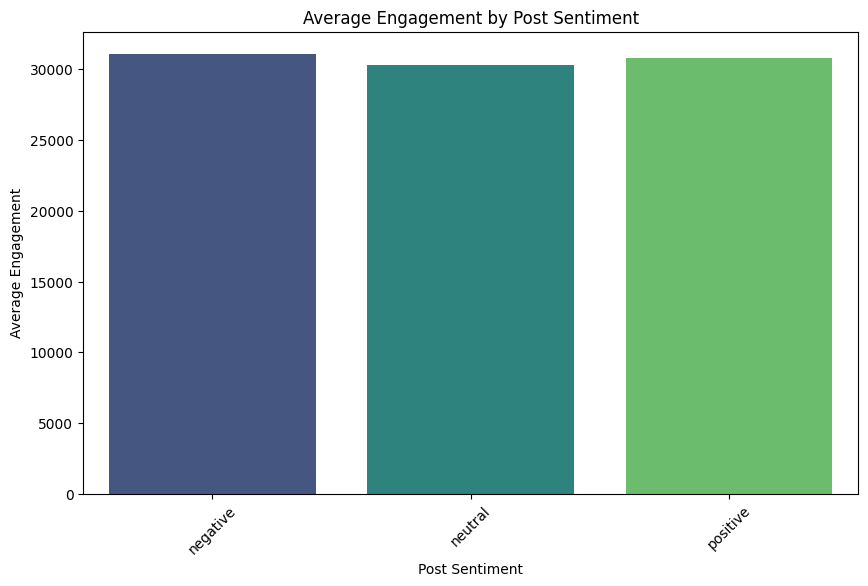

<Figure size 2000x700 with 0 Axes>

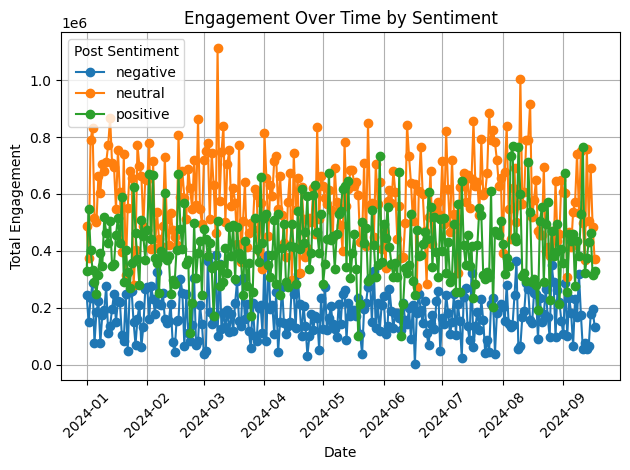

C:\Users\HP\AppData\Local\Temp\ipykernel_29100\3133610133.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Engagement', y='Hashtags', data=hashtag_engagement.sort_values(by='Engagement', ascending=False).head(10), palette='magma')


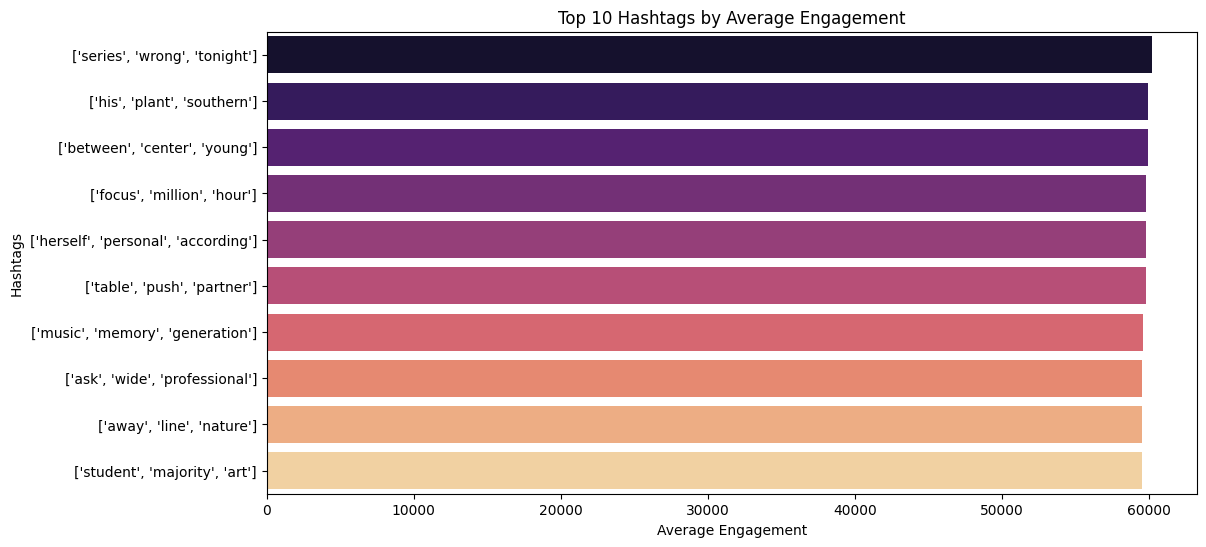

In [ ]:
df['Engagement'] = df['Like_Count'] + df['Comment_Count'] + df['View_Count']

engagement_by_sentiment = df.groupby('Predicted_Sentiment')['Engagement'].mean().reset_index()
# engagement by sentiments
plt.figure(figsize=(10, 6))
sns.barplot(x='Predicted_Sentiment', y='Engagement', data=engagement_by_sentiment, palette='viridis')
plt.title('Average Engagement by Post Sentiment')
plt.xlabel('Post Sentiment')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.show()

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date  # Extracted date for daily analysis

engagement_over_time = df.groupby(['Date', 'Predicted_Sentiment'])['Engagement'].sum().unstack()

# engagement over time with respect to the sentiments
plt.figure(figsize=(20, 7))
engagement_over_time.plot(kind='line', marker='o')
plt.title('Engagement Over Time by Sentiment')
plt.xlabel('Date')
plt.ylabel('Total Engagement')
plt.legend(title='Post Sentiment')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

hashtag_engagement = df.explode('Hashtags').groupby('Hashtags')['Engagement'].mean().reset_index()

# engagement by hashtag
plt.figure(figsize=(12, 6))
sns.barplot(x='Engagement', y='Hashtags', data=hashtag_engagement.sort_values(by='Engagement', ascending=False).head(10), palette='magma')
plt.title('Top 10 Hashtags by Average Engagement')
plt.xlabel('Average Engagement')
plt.ylabel('Hashtags')
plt.show()


## Outlier detection

In [16]:
from scipy import stats
df['Z_Score'] = stats.zscore(df['Engagement'])
outliers_z = df[(df['Z_Score'] > 3) | (df['Z_Score'] < -3)]

# IQR method for outlier detection
Q1 = df['Engagement'].quantile(0.25)
Q3 = df['Engagement'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['Engagement'] < lower_bound) | (df['Engagement'] > upper_bound)]

print("Outliers detected using Z-score method:")
print(outliers_z[['Post_ID', 'Engagement', 'Z_Score']])
print("\nOutliers detected using IQR method:")
print(outliers_iqr[['Post_ID', 'Engagement']])

# there are basically no outliers detected

Outliers detected using Z-score method:
Empty DataFrame
Columns: [Post_ID, Engagement, Z_Score]
Index: []

Outliers detected using IQR method:
Empty DataFrame
Columns: [Post_ID, Engagement]
Index: []


## Comparative analysis

   Sponsored_Post  Avg_Engagement  Total_Engagement    Avg_Likes  Total_Likes  \
0           False    30588.459720         275663199  5053.801709     45544861   
1            True    30506.948381          30140865  4842.645749      4784534   

   Avg_Comments  Total_Comments     Avg_Views  Total_Views  
0    499.266423         4499389  25035.391589    225618949  
1    500.556680          494550  25163.745951     24861781  


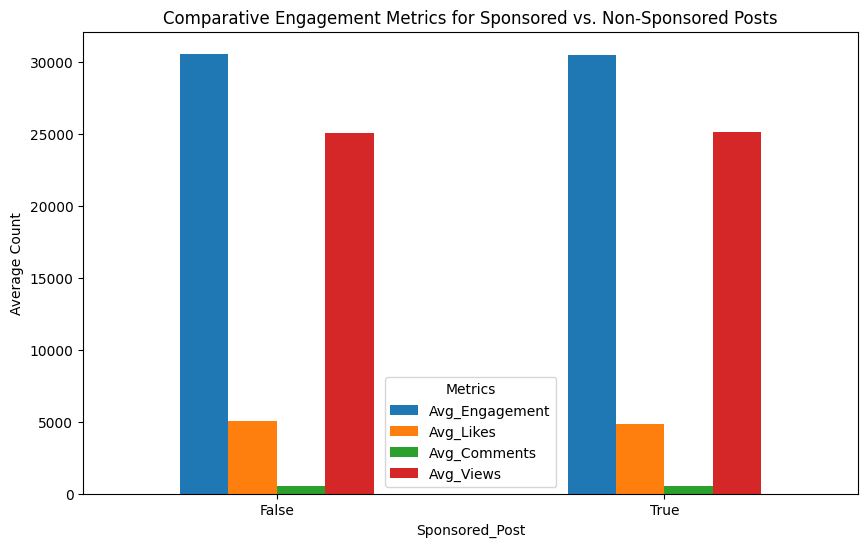

In [17]:
# we are checking if the post is sponsored or not and then checking the metrics for that
comparison = df.groupby('Sponsored_Post').agg({
    'Engagement': ['mean', 'sum'],
    'Like_Count': ['mean', 'sum'],
    'Comment_Count': ['mean', 'sum'],
    'View_Count': ['mean', 'sum'],
    
}).reset_index()

# Rename columns 
comparison.columns = ['Sponsored_Post', 
                      'Avg_Engagement', 'Total_Engagement', 
                      'Avg_Likes', 'Total_Likes', 
                      'Avg_Comments', 'Total_Comments', 
                      'Avg_Views', 'Total_Views']

print(comparison)

# engagement comparison
comparison.set_index('Sponsored_Post')[['Avg_Engagement', 'Avg_Likes', 'Avg_Comments', 'Avg_Views']].plot(kind='bar', figsize=(10, 6))
plt.title('Comparative Engagement Metrics for Sponsored vs. Non-Sponsored Posts')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.show()
